In [244]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [245]:
df = pd.read_csv("Unemployment in India.csv")

In [246]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [248]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [249]:
df.shape

(768, 7)

In [250]:
df.dropna(inplace=True)

In [251]:
df.shape

(740, 7)

In [252]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [253]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [254]:
df[' Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [255]:
df[' Date'].unique()

array([' 31-05-2019', ' 30-06-2019', ' 31-07-2019', ' 31-08-2019',
       ' 30-09-2019', ' 31-10-2019', ' 30-11-2019', ' 31-12-2019',
       ' 31-01-2020', ' 29-02-2020', ' 31-03-2020', ' 30-04-2020',
       ' 31-05-2020', ' 30-06-2020'], dtype=object)

In [256]:
df[' Estimated Employed'].nunique()

740

In [257]:
df[' Estimated Labour Participation Rate (%)'].nunique()

626

In [258]:
df['Area'].unique()

array(['Rural', 'Urban'], dtype=object)

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [260]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [261]:
df.shape

(740, 7)

In [262]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

In [263]:
OHE_AREA = OHE.fit_transform(df[['Area']])

In [264]:
Ohe_area = pd.DataFrame(
    OHE_AREA,  # no .toarray()
    columns=OHE.get_feature_names_out(['Area']),  # exact name match
    index=df.index
)
Ohe_area

,Area_Rural,Area_Urban
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
749,0.0,1.0
750,0.0,1.0
751,0.0,1.0
752,0.0,1.0


In [265]:
Ohe_area.isna().sum()

Area_Rural    0
Area_Urban    0
dtype: int64

In [266]:
df = pd.concat([df.drop(columns=['Area']), Ohe_area], axis=1)

In [267]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area_Rural,Area_Urban
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,1.0,0.0
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,1.0,0.0
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,1.0,0.0
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,1.0,0.0
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,1.0,0.0
...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,0.0,1.0
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,0.0,1.0
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,0.0,1.0
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,0.0,1.0


In [268]:
df.shape

(740, 8)

In [269]:
df.shape

(740, 8)

In [270]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area_Rural                                  0
Area_Urban                                  0
dtype: int64

In [271]:
df.drop(columns=['Area_Urban'],inplace=True)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area_Rural                                740 non-null    float64
dtypes: float64(4), object(3)
memory usage: 46.2+ KB


In [273]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area_Rural
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,1.0
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,1.0
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,1.0
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,1.0
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,1.0
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,0.0
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,0.0
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,0.0
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,0.0


In [281]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area_Rural'],
      dtype='object')

In [274]:
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

In [275]:
df[' Frequency'].unique()

array(['Monthly'], dtype=object)

In [276]:
df[' Frequency'] = df[' Frequency'].apply(lambda x: 1 if x == 'Monthly' else 0)


In [277]:
df[' Frequency'].unique()

array([1])

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    int64  
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area_Rural                                740 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 46.2+ KB


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    int64  
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area_Rural                                740 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 46.2+ KB


In [282]:
df.drop(columns=[' Date'],axis=1,inplace=True)

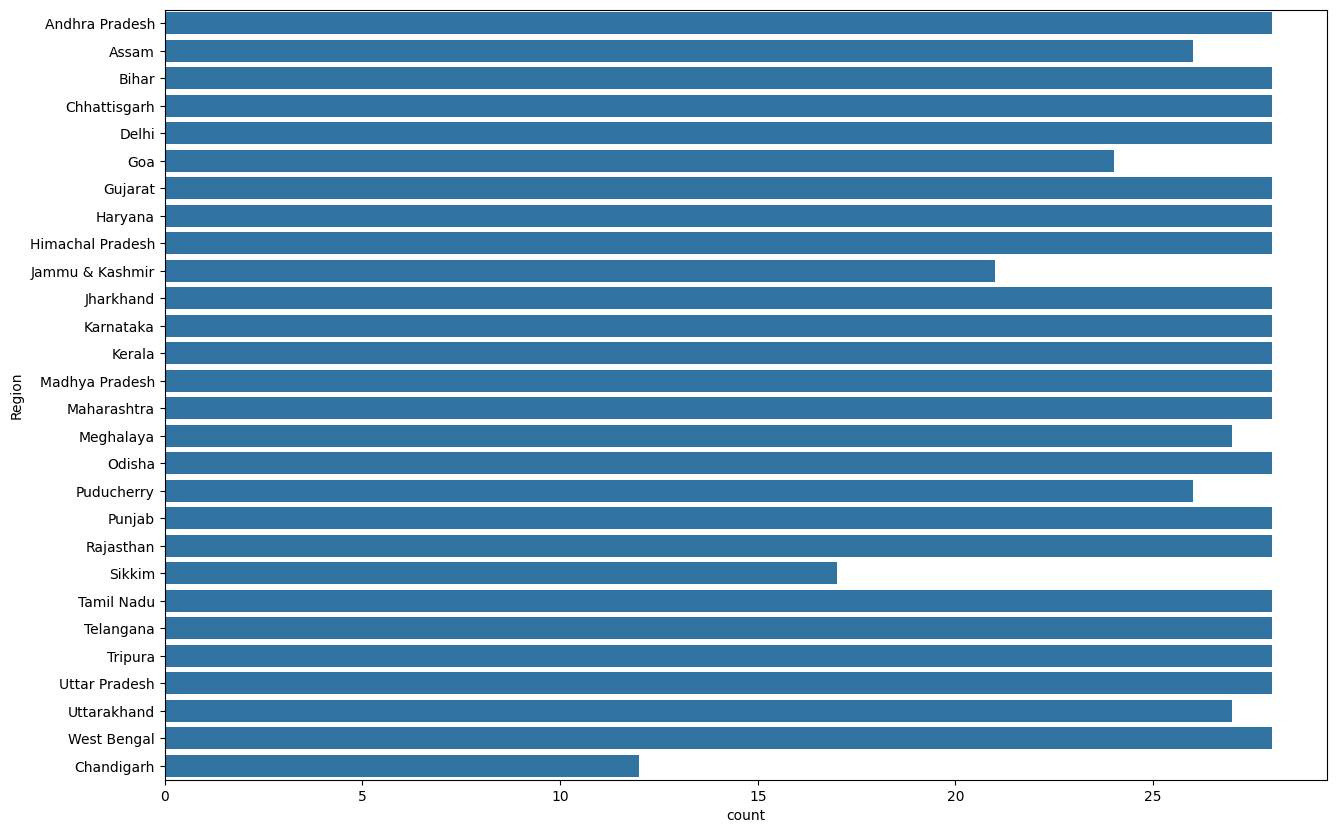

In [285]:
plt.figure(figsize=(15,10))
sns.countplot(y='Region' , data=df)
plt.show()

In [283]:
df['Region'].nunique()

28

In [288]:
avg_unemployment_rate=df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()
state_with_highest_unemployment=avg_unemployment_rate.idxmax()
high_unemployment_rate=avg_unemployment_rate.max()
state_with_lowest_unemployment=avg_unemployment_rate.idxmin()
low_unemploy_rate=avg_unemployment_rate.min()
print(f"state  with  high employment : {state_with_highest_unemployment}")
print(f"high employment rate : {high_unemployment_rate}")
print(f"state  with  low employment : {state_with_lowest_unemployment}")
print(f"low employment rate : {low_unemploy_rate}")

state  with  high employment : Tripura
high employment rate : 28.350357142857142
state  with  low employment : Meghalaya
low employment rate : 4.7988888888888885


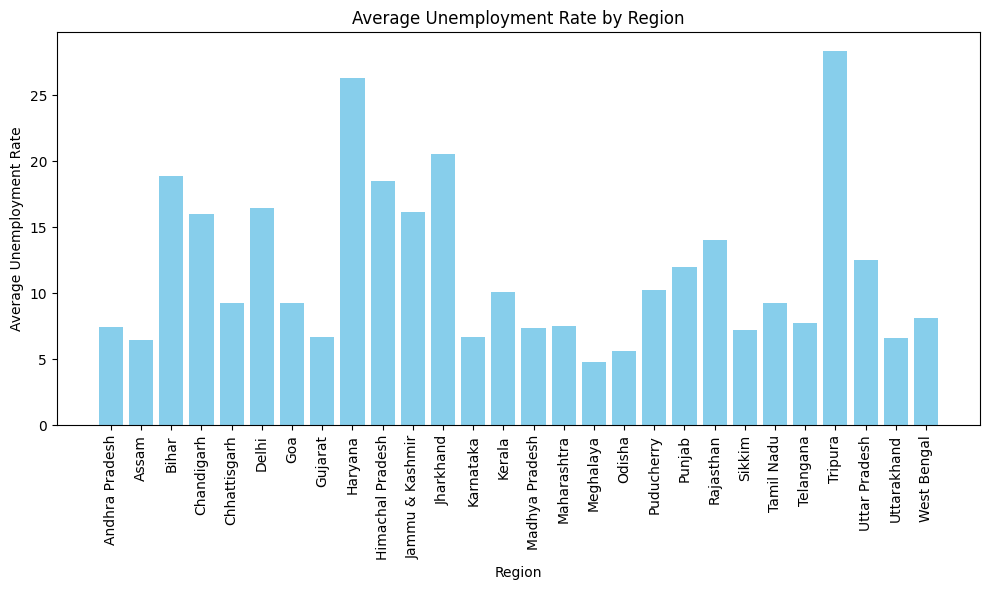

In [289]:
regions = avg_unemployment_rate.index
avg_rates = avg_unemployment_rate.values

plt.figure(figsize=(10, 6))
plt.bar(regions, avg_rates, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()